Period of star RightS175519: 57.14 hours
Flux of star RightS175519: 0.000000000014700
The observed log flux of the star is: -10.8327
The absolute log flux of the star (found using the flux:period relation) is: -4.3014
Distance to star RightS175519: 1843.43 parsecs


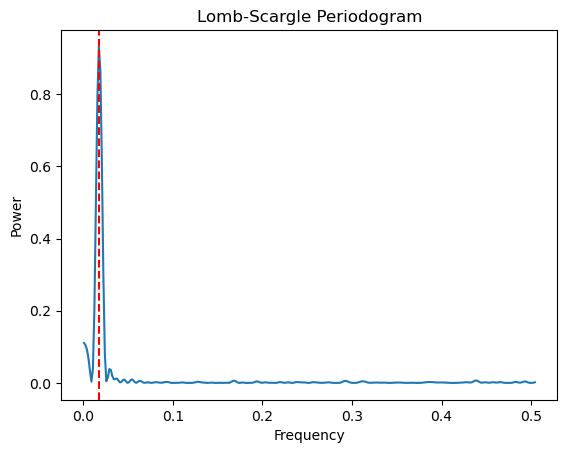

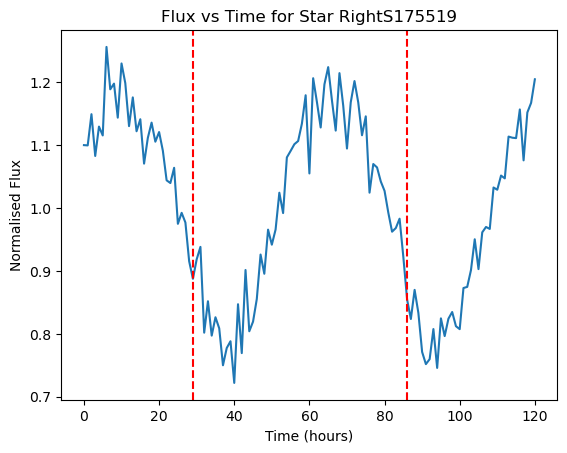

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# Specify which star and which flux band you want to use for the distance calculation
star_id = 'RightS175519'
band = 'Green'

# Load Converted Star Data csv
star_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Star_Data.csv')

# Function to calculate distance to star applying our derived relationships
def calc_distance(period, starflux):
    if period < 30:
        # Use short period variable relationship
        dist = 10**(((period*0.08 - 9.80) - ((np.log10(starflux)))) / 2 )
        absoluteflux = period*0.08 - 9.80
    else:
        # Use long period variable relationship
        dist = 10**(((period*0.06 - 7.73) - ((np.log10(starflux)))) / 2 )
        absoluteflux = period*0.06 - 7.73
    return dist, absoluteflux

# variables
var_data = pd.read_csv(f'/Users/kobibrown/Desktop/Distance_Ladder_Project/Variable_Star_Data/{star_id}.csv')

# pull information
time = var_data['Time']
flux = var_data['NormalisedFlux']

# Compute the Lomb-Scargle periodogram
frequency, power = LombScargle(time, flux).autopower(method='fast', nyquist_factor=1)

# Find the frequency corresponding to the maximum power
max_power_idx = np.argmax(power)
best_frequency = frequency[max_power_idx]

# Convert frequency to period
period = 1 / best_frequency

# Get the flux in the desired band from the Converted Star Data
starflux = star_data.loc[star_data['Name'] == star_id, f'{band}F'].values[0]

# Calculate the distance to the star
distance, absoluteflux = calc_distance(period, starflux)

# Print the results
print(f'Period of star {star_id}: {period:.2f} hours')
print(f'Flux of star {star_id}: {starflux:.15f}')
print(f'The observed log flux of the star is: {np.log10(starflux):.4f}')
if period < 30:
    print(f'The absolute log flux of the star (found using the flux:period relation) is: {period*0.08 - 9.80:.4f}')
else:
    print(f'The absolute log flux of the star (found using the flux:period relation) is: {period*0.06 - 7.73:.4f}')
print(f'Distance to star {star_id}: {distance:.2f} parsecs')

# Plot the periodogram
plt.plot(frequency, power)
plt.axvline(x=best_frequency, color='r', linestyle='--')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

# Plot the flux vs time data and highlight the calculated period
plt.plot(time, flux)
plt.axvline(x=time[np.argmin(np.abs(time - period/2))], color='r', linestyle='--')
plt.axvline(x=time[np.argmin(np.abs(time - 3*period/2))], color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Normalised Flux')
plt.title(f'Flux vs Time for Star {star_id}')
plt.show()
